# Open Exploration (Disaggregated Outcomes)

... [add NB description] ...

## 1. Model and dependency import

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ema_workbench import (Scenario, Policy, MultiprocessingEvaluator, perform_experiments, ema_logging)
from ema_workbench import Samplers
from ema_workbench import save_results, load_results
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

# Model
from problem_formulation import get_model_for_problem_formulation

In [2]:
prob_formulation = 6

model, steps = get_model_for_problem_formulation(prob_formulation)
uncertainties = model.uncertainties
levers = model.levers

In [3]:
len(uncertainties), len(levers)

(18, 21)

In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

n_scenario = 500
n_policy = 100

with MultiprocessingEvaluator(model, n_processes=4) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenario,
                                            policies=n_policy,
                                            lever_sampling=Samplers.LHS
                                            )

save_results(results, 'results/GSA_PF{}_S{}_P{}_.tar.gz'.format(prob_formulation,n_scenario,n_policy))

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 500 scenarios * 100 policies * 1 model(s) = 50000 experiments
100%|████████████████████████████████████| 50000/50000 [41:41<00:00, 19.99it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to /Users/racheldelvin/Desktop/epa141a-flood-policy-optimization-overijssel/final assignment/results/GSA_PF6_S500_P100_.tar.gz


In [ ]:
from ema_workbench.analysis import prim

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x=experiments, y=y, threshold=0.7, peel_alpha=0.1, mode=RuleInductionType.BINARY)
box_casualties = prim_alg.find_box()

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 400000 points remaining, containing 20000 cases of interest


In [ ]:
model, steps = get_model_for_problem_formulation(1)
uncertainties = model.uncertainties
levers = model.levers

In [3]:
len(uncertainties), len(levers)

(18, 21)

In [4]:
results = load_results('results/GSA_PF6_S500_P800_.tar.gz')
experiments, outcomes = results

In [5]:
outcomes

{'Expected Annual Damage': array([1.07563765e+07, 4.23619314e+08, 0.00000000e+00, ...,
        5.93330672e+08, 7.66332302e+08, 3.07334763e+06]),
 'Total Investment Costs': array([1.34597157e+09, 1.34599347e+09, 1.34597086e+09, ...,
        8.20938476e+08, 8.20937623e+08, 8.20925877e+08]),
 'Expected Number of Deaths': array([0.00121945, 0.08645608, 0.        , ..., 0.09575863, 0.09344048,
        0.0003728 ])}

In [6]:
var_interest = 'Expected Number of Deaths'
threshold = np.percentile(outcomes[var_interest], 95)

y = outcomes[var_interest] >= threshold

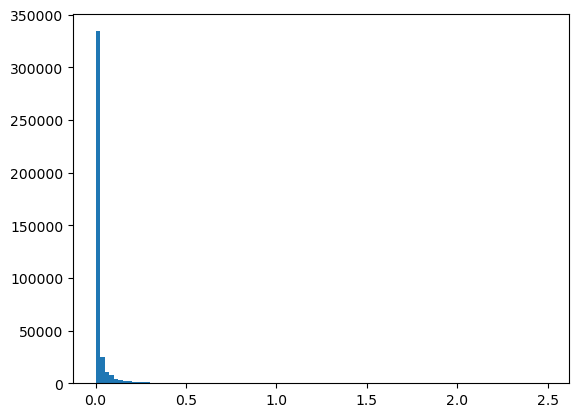

0.0 2.492345693998904
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.98953912e-03 5.19147653e-02 2.49234569e+00]


In [7]:
import matplotlib.pyplot as plt
plt.hist(outcomes[var_interest], bins=100)
plt.show()
print(np.min(outcomes[var_interest]), np.max(outcomes[var_interest]))
print(np.percentile(outcomes[var_interest], [0, 5, 10, 20, 50, 90, 100]))

In [8]:
print(np.sum(y))
print(np.unique(y, return_counts=True))

20000
(array([False,  True]), array([380000,  20000]))


In [9]:
experiments.drop(columns=list(model.levers.keys()), inplace=True)

In [ ]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,scenario,policy,model
0,128,251.879396,1.0,0.923106,291.867662,10.0,0.887255,322.389498,10.0,0.967830,...,10.0,0.874362,66.818719,10.0,0.107165,1.5,2.5,205901,205101,dikesnet
1,60,194.657801,1.0,0.705556,196.414942,10.0,0.876642,31.397941,1.0,0.007375,...,1.0,0.943311,322.555105,1.0,0.737610,1.5,1.5,205902,205101,dikesnet
2,110,152.047042,1.0,0.894195,183.193248,1.0,0.405141,228.799687,1.0,0.495500,...,10.0,0.417344,104.994646,1.0,0.872160,1.5,1.5,205903,205101,dikesnet
3,82,117.534907,10.0,0.200063,182.302882,1.5,0.964595,283.243660,10.0,0.257390,...,1.5,0.958602,330.691899,1.5,0.696232,2.5,3.5,205904,205101,dikesnet
4,113,269.695739,10.0,0.172967,77.019900,1.0,0.447764,139.189093,1.0,0.397870,...,1.5,0.008510,219.669583,1.0,0.384015,1.5,2.5,205905,205101,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,92,204.729302,1.5,0.888777,175.396476,10.0,0.019208,57.100925,1.0,0.617473,...,1.5,0.196637,217.624138,10.0,0.927771,3.5,2.5,206396,205900,dikesnet
399996,11,313.020609,10.0,0.832282,66.679703,10.0,0.204920,130.582671,1.0,0.423069,...,10.0,0.343265,60.926266,1.5,0.453157,3.5,1.5,206397,205900,dikesnet
399997,74,345.866311,1.5,0.014725,221.529438,1.0,0.095595,72.914159,1.0,0.887542,...,1.0,0.023685,114.572319,1.5,0.270607,4.5,2.5,206398,205900,dikesnet
399998,16,167.702052,10.0,0.013255,188.230106,1.5,0.131265,301.025169,1.0,0.797965,...,1.5,0.888266,187.706670,1.0,0.097207,2.5,2.5,206399,205900,dikesnet


: 

In [ ]:
from ema_workbench.analysis import prim

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x=experiments, y=y, threshold=0.7, peel_alpha=0.1, mode=RuleInductionType.BINARY)
box_casualties = prim_alg.find_box()

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 400000 points remaining, containing 20000 cases of interest
